In [1]:
# Import relevant libraries
import os
import sys
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Import custom data loader
sys.path.append('../src')
from data_loader import load_fan_data

In [2]:
# Load the fan metadata dataframe
sys.path.append('../src')
from data_loader import load_fan_data
fan_df = load_fan_data("../data/fan")
fan_df.head()

,file_path,fan_id,label
0,..\data\fan\id_00\abnormal\00000000.wav,id_00,abnormal
1,..\data\fan\id_00\abnormal\00000001.wav,id_00,abnormal
2,..\data\fan\id_00\abnormal\00000002.wav,id_00,abnormal
3,..\data\fan\id_00\abnormal\00000003.wav,id_00,abnormal
4,..\data\fan\id_00\abnormal\00000004.wav,id_00,abnormal


In [3]:
# Carry out the above steps for the same fan which is in a 'normal' state
# Ensures comparison of the same physical machine in two different states

# Select the first abnormal example for fan 'id_00'
abnormal_fan_example = fan_df[(fan_df['label'] == 'abnormal') & (fan_df['fan_id'] == 'id_00')].iloc[0]

# Select the first normal example for fan 'id_00'
normal_fan_example = fan_df[(fan_df['label'] == 'normal') & (fan_df['fan_id'] == 'id_00')].iloc[0]

# Load and process both audio files
y_abnormal, sr_abnormal = librosa.load(abnormal_fan_example['file_path'])
y_normal, sr_normal = librosa.load(normal_fan_example['file_path'])

# Create Mel spectrograms
spec_abnormal = librosa.feature.melspectrogram(y=y_abnormal, sr=sr_abnormal)
spec_normal = librosa.feature.melspectrogram(y=y_normal, sr=sr_normal)

# Convert spectrograms to decibel (dB) scale for better visualization
db_spec_abnormal = librosa.power_to_db(spec_abnormal, ref=np.max)
db_spec_normal = librosa.power_to_db(spec_normal, ref=np.max)

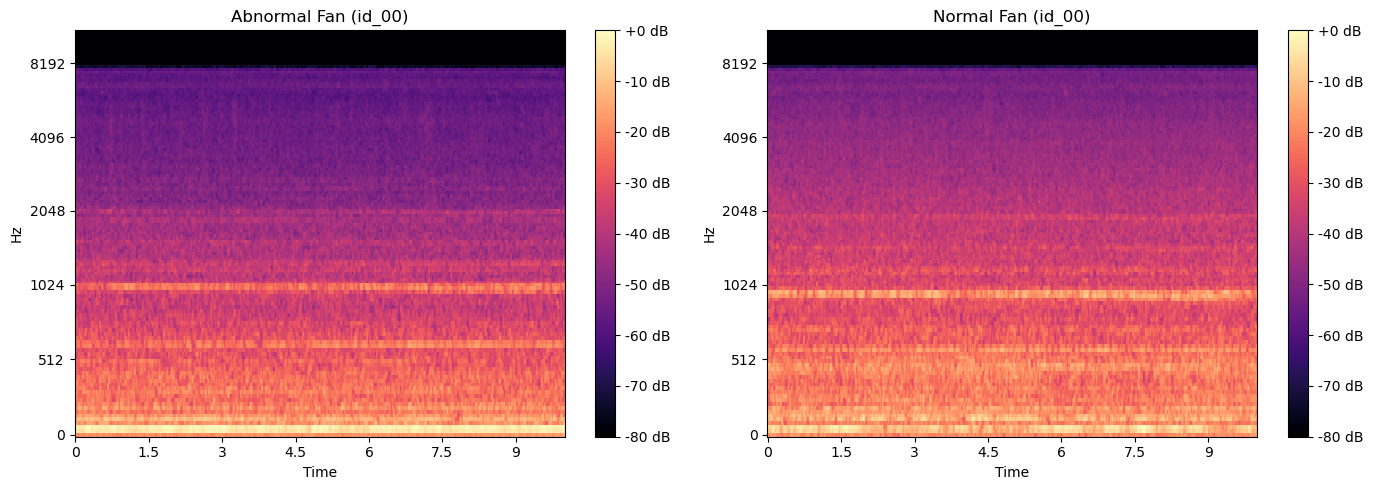

In [4]:
# Plot them side by side for comparison
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,5))

# Plot abnormal spectrogram
img_abnormal = librosa.display.specshow(db_spec_abnormal, sr=sr_abnormal, x_axis='time', y_axis='mel', ax=ax[0])
ax[0].set_title('Abnormal Fan (id_00)')
fig.colorbar(img_abnormal, ax=ax[0], format='%+2.0f dB')

# Plot normal spectrogram
img_normal = librosa.display.specshow(db_spec_normal, sr=sr_normal, x_axis='time', y_axis='mel', ax=ax[1])
ax[1].set_title('Normal Fan (id_00)')
fig.colorbar(img_normal, ax=ax[1], format='%+2.0f dB')

plt.tight_layout()
plt.show()

In [ ]:
def save_spectrogram(spectrogram_data, file_path):
    """Saves a spectrogram numpy array as a PNG image."""
    # Create a new figure with no visible elements
    fig = plt.figure(frameon=False)
    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Use librosa to display the spectrogram on the axes
    librosa.display.specshow(spectrogram_data, ax=ax)
    
    # Save the figure
    fig.savefig(file_path)
    plt.close(fig)

In [9]:
save_spectrogram(db_spec_abnormal, '../data/processed/fan/abnormal/abnormal_example')